### Preprocess
- Re-categorizing ascending to descending, or vice versa doesn't have any impact the model accuracy.
- Use one hot encoder to set 'sex'? Gender seem binary '1' or '0' -- Can be ignored since it is a binary class.
- cp should be descending
- slope should be descending Downslop (severe), Horizontal and upsloping
- Use one hot encoder to set 'thal'c-- Can be ignored for (or experiment later)
\
DON'T WASTE TIME!!

Method:
1. Test Standardization vs Scaling with base model
2.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('data/uci-heart-disease/cleveland-cleaned.csv')
data.head(3)

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
y

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X[0:5]

array([[0.70833333, 1.        , 0.        , 0.48113208, 0.24429224,
        1.        , 1.        , 0.60305344, 0.        , 0.37096774,
        1.        , 0.        , 0.75      ],
       [0.79166667, 1.        , 1.        , 0.62264151, 0.3652968 ,
        0.        , 1.        , 0.28244275, 1.        , 0.24193548,
        0.5       , 1.        , 0.        ],
       [0.79166667, 1.        , 1.        , 0.24528302, 0.23515982,
        0.        , 1.        , 0.44274809, 1.        , 0.41935484,
        0.5       , 0.66666667, 1.        ],
       [0.16666667, 1.        , 0.66666667, 0.33962264, 0.28310502,
        0.        , 0.        , 0.88549618, 0.        , 0.56451613,
        1.        , 0.        , 0.        ],
       [0.25      , 0.        , 0.33333333, 0.33962264, 0.17808219,
        0.        , 1.        , 0.77099237, 0.        , 0.22580645,
        0.        , 0.        , 0.        ]])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [ ]:
X_test[0:5]

In [ ]:
y_test.head()

# Base model
- classification report
- confusion matrix

In [59]:
svc= SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc=accuracy_score(y_test, y_pred)*100
print("SVM - Accuracy: {:.3f}.".format(acc))
print("\nClassification Report")
print(classification_report(y_test, y_pred))

SVM - Accuracy: 83.333.

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [93]:
# There were 60 records in test with equal class (1 and 0).
# Meanwhile, the prediction was 24:36
pd.DataFrame(y_pred).value_counts()

0
0    36
1    24
Name: count, dtype: int64

- <b>Precision</b> - 92% (22/24) prediction was correct in overall disease prediction
- <b>Recall</b> - 73% (22/30) prediction for disease was correct

In [94]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28  2]
 [ 8 22]]


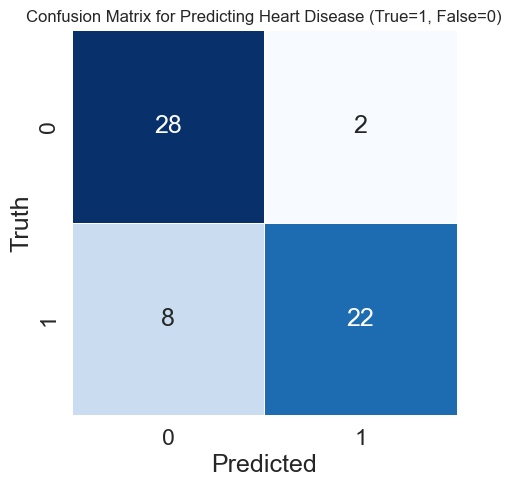

In [95]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues', cbar=False)
# plt.ylabel('Actual');
# plt.xlabel('Predicted');
plt.ylabel('Truth');
plt.xlabel('Predicted');
plt.title("Confusion Matrix for Predicting Heart Disease (True=1, False=0)", size=12);

### GridSerachCV

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from numpy import arange
grid_svc= SVC()

parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

## Building Grid Search algorithm with cross-validation and acc score.

# grid_search_svc = GridSearchCV(grid_svc, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_svc = GridSearchCV(grid_svc, parameters, scoring='accuracy', cv=5)

grid_search_svc.fit(X_train,y_train)
best_parameters_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_
print(best_parameters_svc)
print(best_score_svc)

y_pred = grid_search_svc.predict(X_test)

# Get the accuracy score
svc_acc=accuracy_score(y_test, y_pred)*100
svc_pre=precision_score(y_test, y_pred, average='micro')
svc_recall=recall_score(y_test, y_pred, average='micro')
svc_f1_=f1_score(y_test, y_pred, average='micro')

print("\nSVM - Accuracy: {:.3f}.".format(svc_acc))
print("SVM - Precision: {:.3f}.".format(svc_pre))
print("SVM - Recall: {:.3f}.".format(svc_recall))
print("SVM - F1_Score: {:.3f}.".format(svc_f1_))
print("\nClassification Report")
print(classification_report(y_test, y_pred))

{'C': 6, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'sigmoid'}
0.8566489361702129

SVM - Accuracy: 80.000.
SVM - Precision: 0.800.
SVM - Recall: 0.800.
SVM - F1_Score: 0.800.

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



### RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from numpy import arange
rand_svc= SVC()

parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

## Building Grid Search algorithm with cross-validation and acc score.

rand_search_svc = RandomizedSearchCV(rand_svc, parameters, scoring='accuracy', cv=5)

rand_search_svc.fit(X_train,y_train)
best_parameters_svc = rand_search_svc.best_params_
best_score_svc = rand_search_svc.best_score_
print(best_parameters_svc)
print(best_score_svc)

y_pred = rand_search_svc.predict(X_test)

# Get the accuracy score
svc_acc=accuracy_score(y_test, y_pred)*100
svc_pre=precision_score(y_test, y_pred, average='micro')
svc_recall=recall_score(y_test, y_pred, average='micro')
svc_f1_=f1_score(y_test, y_pred, average='micro')

print("\nSVM - Accuracy: {:.3f}.".format(svc_acc))
print("SVM - Precision: {:.3f}.".format(svc_pre))
print("SVM - Recall: {:.3f}.".format(svc_recall))
print("SVM - F1_Score: {:.3f}.".format(svc_f1_))
print("\nClassification Report")
print(classification_report(y_test, y_pred))